In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [164]:
base_path = '/home/local/lambda/rishabhs/ML/data_science_lab/kagglecomp'
train = pd.read_csv("data/data-science-comp-f2020/train_final.csv")
test = pd.read_csv("data/data-science-comp-f2020/test_final.csv")

In [165]:
train.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


In [166]:
train.shape

(16383, 26)

In [167]:
all_data = pd.concat((train.loc[:,'f1':'f24'],
                      test.loc[:,'f1':'f24']))

In [168]:
all_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,25884,1,33.63,118596,1,0,118595,125738,1,3,...,1945,118450,119184,1,121372,1,1,1,2,1
1,34346,1,10.62,118041,1,0,117902,130913,1,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,34923,1,1.77,118327,1,0,117961,124402,1,2,...,7547,118933,290919,1,118784,1,1,1,1,1
3,80926,1,30.09,118300,1,0,117961,301218,1,0,...,4933,118458,118331,1,307024,1,1,1,2,1
4,4674,1,1.77,119921,1,0,119920,302830,1,0,...,13836,142145,4673,1,128230,1,1,1,620,1


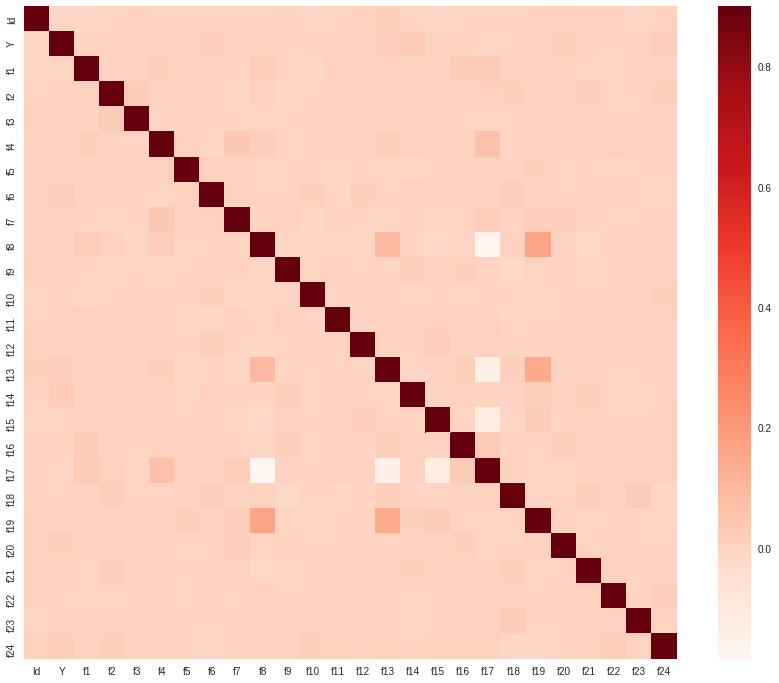

In [169]:
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

In [170]:
cat1= all_data.f3.unique()

In [171]:
cat1.shape

(241,)

In [172]:
all_data.f3.shape

(32768,)

In [173]:
all_data.f4.shape

(32768,)

In [174]:
cat2= all_data.f4.unique()

In [175]:
cat2.shape

(177,)

In [176]:
cat3= all_data.f6.unique()

In [177]:
cat3.shape

(10,)

In [178]:
all_data.f6.shape

(32768,)

In [179]:
all_data.f16.shape

(32768,)

In [180]:
cat4=all_data.f16.unique()

In [181]:
cat4.shape

(449,)

In [182]:
all_data.f7.shape

(32768,)

In [183]:
cat5= all_data.f7.unique()

In [184]:
cat5.shape

(128,)

In [185]:
all_data.f4.value_counts()

118300    4423
118343    3945
118327    2641
118225    2547
118386    1796
          ... 
119344       1
131390       1
141222       1
147237       1
120355       1
Name: f4, Length: 177, dtype: int64

In [186]:
no_col= len(all_data.columns)
print(no_col)

24


In [187]:
list1=[]
list2=[]
list3=[]
list4=[]
list1= list(all_data.columns.values)

In [188]:
for i in range(0,len(list1)):
    unique_val= all_data[list1[i]].value_counts().count()
    len_col= len(all_data[list1[i]])
    list2.append(unique_val)
    list3.append(len_col)

In [189]:
print(list2)
print(list3)

[7518, 8, 241, 177, 9, 10, 128, 2358, 11, 267, 7, 244, 343, 22770, 4243, 449, 67, 9, 343, 8, 9, 7, 1413, 8]
[32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768]


In [190]:
for i in range(0,len(list2)):
    
    if list2[i]>2 and list2[i]<=15:
        list4.append(i)

In [191]:
print(list4)

[1, 4, 5, 8, 10, 17, 19, 20, 21, 23]


In [192]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32768 entries, 0 to 16384
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      32768 non-null  int64  
 1   f2      32768 non-null  int64  
 2   f3      32768 non-null  float64
 3   f4      32768 non-null  int64  
 4   f5      32768 non-null  int64  
 5   f6      32768 non-null  int64  
 6   f7      32768 non-null  int64  
 7   f8      32768 non-null  int64  
 8   f9      32768 non-null  int64  
 9   f10     32768 non-null  int64  
 10  f11     32768 non-null  int64  
 11  f12     32768 non-null  int64  
 12  f13     32768 non-null  int64  
 13  f14     32768 non-null  float64
 14  f15     32768 non-null  int64  
 15  f16     32768 non-null  int64  
 16  f17     32768 non-null  int64  
 17  f18     32768 non-null  int64  
 18  f19     32768 non-null  int64  
 19  f20     32768 non-null  int64  
 20  f21     32768 non-null  int64  
 21  f22     32768 non-null  int64  
 22

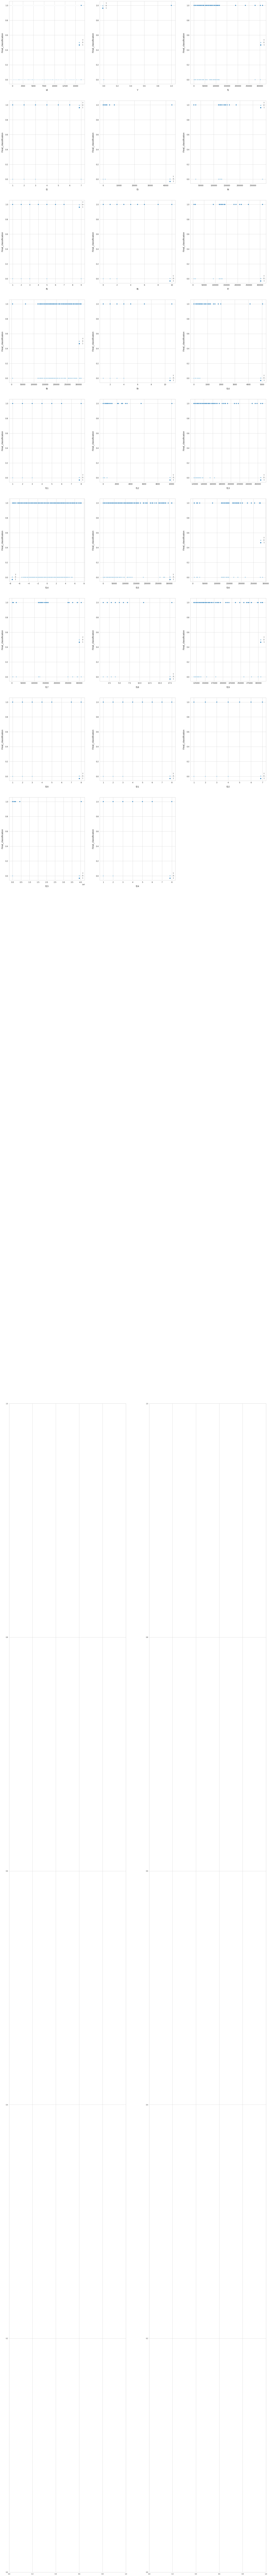

In [193]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)
        
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='Y', hue='Y', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('Final_classification', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [194]:
nom_col=[]
for j in range(0,len(list4)):
    col_name= "f"+str(list4[j]+1)
    nom_col.append(col_name)

In [195]:
all_data[nom_col[0]].value_counts()

1     31646
2       946
3       118
4        40
5        12
6         3
7         2
17        1
Name: f2, dtype: int64

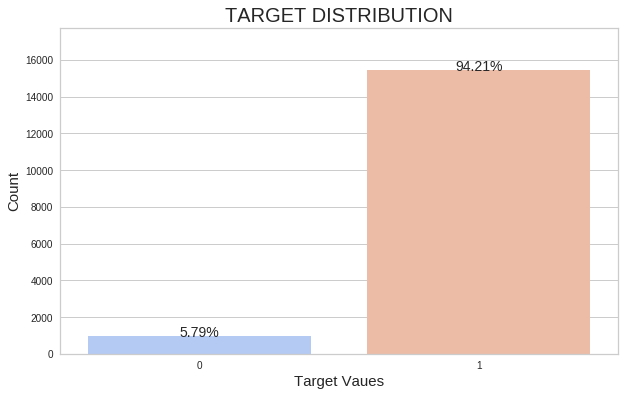

In [196]:
total = len(train)
plt.figure(figsize=(10,6))

g = sns.countplot(x='Y', data=train, palette='coolwarm')
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()


In [197]:
import matplotlib.gridspec as gridspec


def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]): 
        tmp = pd.crosstab(train[col], train['Y'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].unique()) , palette='Set3') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

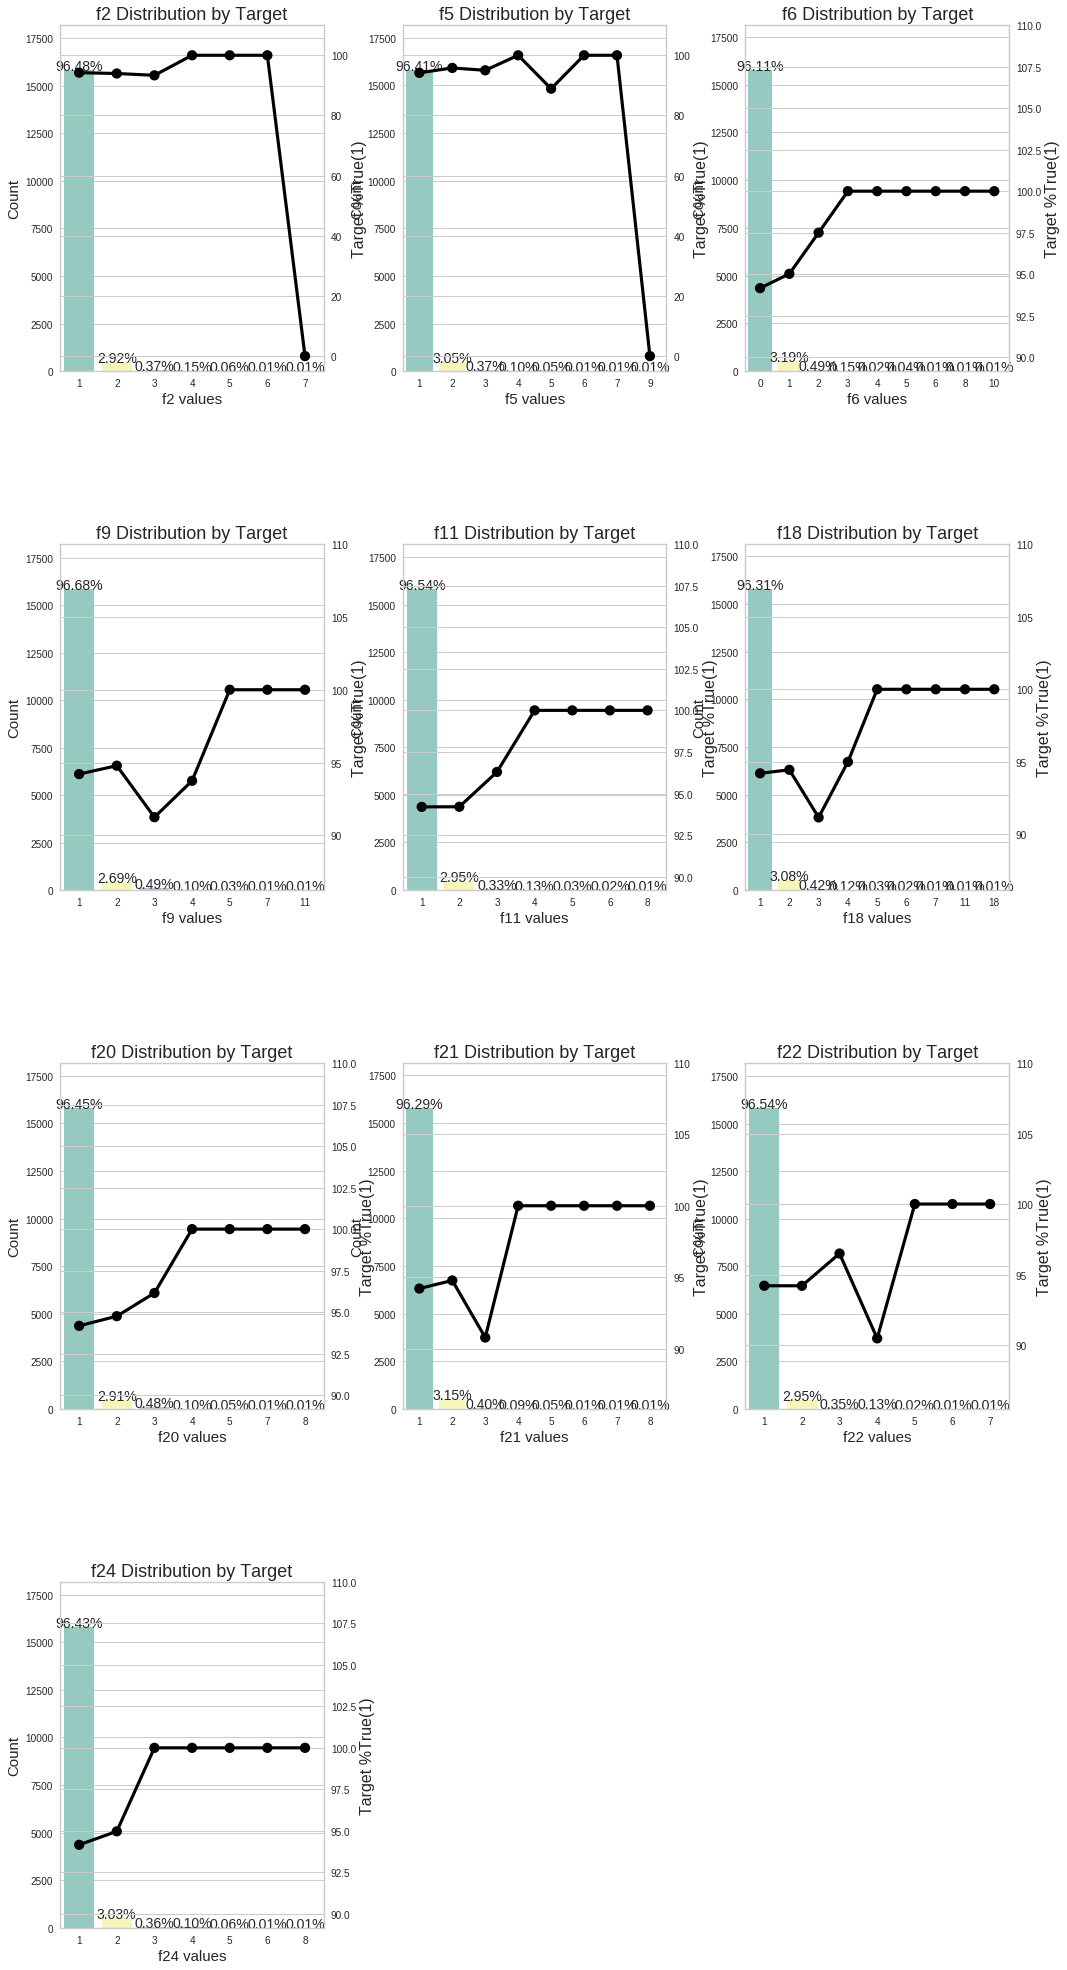

In [313]:
ploting_cat_fet(train, nom_col, vis_row=4, vis_col=3)

In [199]:
"""test['target'] = 'test'
df = pd.concat([train, test], axis=0, sort=False )"""

"test['target'] = 'test'\ndf = pd.concat([train, test], axis=0, sort=False )"

In [200]:
"""print(f'Shape before dummy transformation: {df.shape}')
#df = pd.get_dummies(df, columns= nom_col,\
#                          prefix= nom_col, drop_first=True)
#print(f'Shape after dummy transformation: {df.shape}')"""

"print(f'Shape before dummy transformation: {df.shape}')\n#df = pd.get_dummies(df, columns= nom_col,#                          prefix= nom_col, drop_first=True)\n#print(f'Shape after dummy transformation: {df.shape}')"

In [201]:
"""df_train, df_test = df[df['target'] != 'test'], df[df['target'] == 'test'].drop('target', axis=1)
del df"""

"df_train, df_test = df[df['target'] != 'test'], df[df['target'] == 'test'].drop('target', axis=1)\ndel df"

In [202]:
#df_train.head()

In [203]:
all_cols= list(all_data.columns)
high_card_nom= list(set(all_cols)-set(nom_col))
print(high_card_nom)

['f7', 'f15', 'f4', 'f16', 'f8', 'f12', 'f17', 'f3', 'f23', 'f13', 'f10', 'f14', 'f1', 'f19']


In [204]:
"""for col in high_card_nom:
    df_train[f'hash_{col}'] = df_train[col].apply( lambda x: hash(str(x)) % 5000 )
    df_test[f'hash_{col}'] = df_test[col].apply( lambda x: hash(str(x)) % 5000 )"""

"for col in high_card_nom:\n    df_train[f'hash_{col}'] = df_train[col].apply( lambda x: hash(str(x)) % 5000 )\n    df_test[f'hash_{col}'] = df_test[col].apply( lambda x: hash(str(x)) % 5000 )"

In [205]:
for col in high_card_nom:
    print(col)
    enc_nom_1 = (train.groupby(col).size()) / len(train)
    train[f'freq_{col}'] = train[col].apply(lambda x : enc_nom_1[x])
    enc_nom_1 = (test.groupby(col).size()) / len(test)
    test[f'freq_{col}'] = test[col].apply(lambda x : enc_nom_1[x])

f7
f15
f4
f16
f8
f12
f17
f3
f23
f13
f10
f14
f1
f19


In [206]:
train[['f14', 'freq_f14', ]].head()


,f14,freq_f14
0,-2.266430,0.000061
1,-0.305612,0.000061
2,2.015561,0.000061
3,-3.172501,0.000061
4,0.573767,0.000061


In [207]:
encoding=[]

train.head()
train.shape



(16383, 40)

In [208]:
train.columns

Index(['Id', 'Y', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'freq_f7', 'freq_f15', 'freq_f4',
       'freq_f16', 'freq_f8', 'freq_f12', 'freq_f17', 'freq_f3', 'freq_f23',
       'freq_f13', 'freq_f10', 'freq_f14', 'freq_f1', 'freq_f19'],
      dtype='object')

In [209]:
test.columns

Index(['Id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'freq_f7', 'freq_f15', 'freq_f4',
       'freq_f16', 'freq_f8', 'freq_f12', 'freq_f17', 'freq_f3', 'freq_f23',
       'freq_f13', 'freq_f10', 'freq_f14', 'freq_f1', 'freq_f19'],
      dtype='object')

In [210]:
"""for col in high_card_nom:
    col_name= "freq_"+ str(col)
    encoding.append(col_name)
    
df_train_new= pd.DataFrame()
print(df_train_new)
    
for col in df_train.columns:
    if any(element != col for element in encoding):
        df_train.drop([col],axis=1, inplace=True)

for item in encoding:
    column= list(train[item])
    df_train_new.insert(0,item,column,True)
    
for col in nom_col:
    column= list(train[col])
    df_train_new.insert(0,col,column,True)
    
for col in high_card_nom:
    column= list(train[col])
    df_train_new.insert(0,col,column,True)
        
df_train_new.head()"""

'for col in high_card_nom:\n    col_name= "freq_"+ str(col)\n    encoding.append(col_name)\n    \ndf_train_new= pd.DataFrame()\nprint(df_train_new)\n    \nfor col in df_train.columns:\n    if any(element != col for element in encoding):\n        df_train.drop([col],axis=1, inplace=True)\n\nfor item in encoding:\n    column= list(train[item])\n    df_train_new.insert(0,item,column,True)\n    \nfor col in nom_col:\n    column= list(train[col])\n    df_train_new.insert(0,col,column,True)\n    \nfor col in high_card_nom:\n    column= list(train[col])\n    df_train_new.insert(0,col,column,True)\n        \ndf_train_new.head()'

In [211]:
"""for col in high_card_nom:
    col_name= "freq_"+ str(col)
    encoding.append(col_name)
    
df_test_new= pd.DataFrame()
print(df_test_new)
    
for col in df_train.columns:
    if any(element != col for element in encoding):
        df_train.drop([col],axis=1, inplace=True)

for item in encoding:
    column= list(test[item])
    df_test_new.insert(0,item,column,True)
    
df_test_new.head()
    
for col in nom_col:
    column= list(test[col])
    df_test_new.insert(0,col,column,True)
    
for col in high_card_nom:
    column= list(test[col])
    df_test_new.insert(0,col,column,True)"""
        
#df_test_new.head()
#df_test_new.columns"""

'for col in high_card_nom:\n    col_name= "freq_"+ str(col)\n    encoding.append(col_name)\n    \ndf_test_new= pd.DataFrame()\nprint(df_test_new)\n    \nfor col in df_train.columns:\n    if any(element != col for element in encoding):\n        df_train.drop([col],axis=1, inplace=True)\n\nfor item in encoding:\n    column= list(test[item])\n    df_test_new.insert(0,item,column,True)\n    \ndf_test_new.head()\n    \nfor col in nom_col:\n    column= list(test[col])\n    df_test_new.insert(0,col,column,True)\n    \nfor col in high_card_nom:\n    column= list(test[col])\n    df_test_new.insert(0,col,column,True)'

## Feature transformations¶
Let's create more features by calculating the log and square transformations of our numerical features. We do this manually, because ML models won't be able to reliably tell if log(feature) or feature^2 is a predictor of the SalePrice.

In [212]:
"""def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['f14']
train = logs(train, log_features)

print('All_Features shape:', train.shape)
train.head()


log_features = ['f14']
test = logs(test, log_features)

print('All_Features shape:', test.shape)
test.head()"""


"def logs(res, ls):\n    m = res.shape[1]\n    for l in ls:\n        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   \n        res.columns.values[m] = l + '_log'\n        m += 1\n    return res\n\nlog_features = ['f14']\ntrain = logs(train, log_features)\n\nprint('All_Features shape:', train.shape)\ntrain.head()\n\n\nlog_features = ['f14']\ntest = logs(test, log_features)\n\nprint('All_Features shape:', test.shape)\ntest.head()"

In [213]:
"""def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['f14']
train = squares(train, squared_features)
print('All_Features shape:', train.shape)
train.head()


squared_features = ['f14']
test = squares(test, squared_features)
print('All_Features shape:', test.shape)
test.head()"""

"def squares(res, ls):\n    m = res.shape[1]\n    for l in ls:\n        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   \n        res.columns.values[m] = l + '_sq'\n        m += 1\n    return res \n\nsquared_features = ['f14']\ntrain = squares(train, squared_features)\nprint('All_Features shape:', train.shape)\ntrain.head()\n\n\nsquared_features = ['f14']\ntest = squares(test, squared_features)\nprint('All_Features shape:', test.shape)\ntest.head()"

In [214]:
Y_Train = train['Y']
X_Train = train.drop(['Y'],axis=1)
X_Train = X_Train.drop(['Id'],axis=1)
#y_train = y_train.astype(bool)
X_Test = test.drop(['Id'],axis=1)

print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)

(16383, 38)
(16383,)
(16385, 38)


In [215]:
null_value_stats = X_Train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

null_value_stats = X_Test.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [216]:
X_Train.fillna(-999, inplace=True)
X_Test.fillna(-999, inplace=True)

In [217]:
from xgboost import plot_importance
from hyperopt import fmin, tpe, hp
import xgboost as xgb
import hyperopt as hyp

In [219]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, lasso_path
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, lasso_path, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from yellowbrick.regressor import AlphaSelection
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, roc_auc_score
from datetime import datetime
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from catboost import CatBoostClassifier, cv, Pool
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold

RANDOM_SEED = 42

kfolds = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
# Function to return the rmse loss
# cv = 5 means 5 folds, check if it works better with more/less number of folds
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(Y_train, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, Y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

def cv_auc(model, X=X_train):
    score_auc = -cross_val_score(model, X, Y_train, scoring="roc_auc", cv=kfolds, n_jobs = 12)
    return (score_auc)

In [220]:
def performance(model, X_test, y_test):
    
    """
    Accepts a fitted model and an evaluation dataset at input.
    Prints the confusion matrix, classification_report & auc score. 
    Also, displays Precision-Recall curve & ROC curve.
    """
    
    # Make predictions on test set
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    
    # Confusion matrix
    print(confusion_matrix(y_test, y_pred))
    
    # AUC score
    y_pred_prob = model.predict_proba(X_test)
    print("AUC score: ", roc_auc_score(y_test, y_pred_prob[:,1]))
    
    # Logloss
    print("Logloss : ", log_loss(y_test, y_pred_prob))

    # Accuracy, Precision, Recall, F1 score
    print(classification_report(y_test, y_pred))
    
    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Neural Network')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [221]:
X_train, X_val, y_train, y_val = train_test_split(X_Train, Y_Train, train_size=0.8, random_state=RANDOM_SEED)

In [222]:
cat_features = np.where(X_train.dtypes != np.float)[0]
#cat_features = [*range(23)]
print(cat_features)
print(X_train.head())
cat_features = np.where(X_train.dtypes != float)[0]
print(cat_features)

[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23]
          f1  f2    f3      f4  f5  f6      f7      f8  f9  f10  ...  \
7712   75833   1  1.77  118052   1   0  117961  120316   1    0  ...   
763    35753   1  1.77  118343   1   0  117961  117906   1    0  ...   
15783  81296   1  1.77  117962   1   0  117961  117906   1    0  ...   
8955   40437   1  7.08  118386   1   0  117961  168365   1    0  ...   
8101   79091   1  3.54  118343   2   0  117961  159709   1    0  ...   

        freq_f8  freq_f12  freq_f17   freq_f3  freq_f23  freq_f13  freq_f10  \
7712   0.004395  0.612708  0.039187  0.612281  0.005310  0.017701  0.608252   
763    0.214185  0.039919  0.339437  0.612281  0.019716  0.109321  0.608252   
15783  0.214185  0.023805  0.339437  0.612281  0.000610  0.144296  0.608252   
8955   0.010010  0.005310  0.013978  0.036379  0.049930  0.005921  0.608252   
8101   0.000366  0.002258  0.014344  0.150522  0.390283  0.002686  0.608252   

       freq_f14   freq_f

In [223]:
# Baseline model trained with X_train and y_train subset; eval is the X_val and y_val subset
model = CatBoostClassifier(custom_metric=['TotalF1'], early_stopping_rounds=200, eval_metric='AUC')

model.fit(X_train, y_train, cat_features=cat_features,
          eval_set=(X_val, y_val), plot=True, verbose=False, use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[  77  104]
 [   8 3088]]
AUC score:  0.9116414692991848
Logloss :  0.11703636846813914
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       181
           1       0.97      1.00      0.98      3096

    accuracy                           0.97      3277
   macro avg       0.94      0.71      0.78      3277
weighted avg       0.96      0.97      0.96      3277



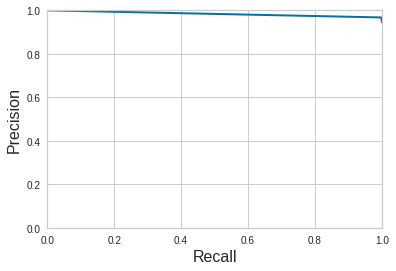

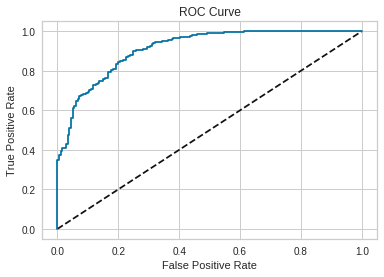

In [224]:
performance(model, X_val, y_val)

Text(0, 0.5, 'Feature Importance')

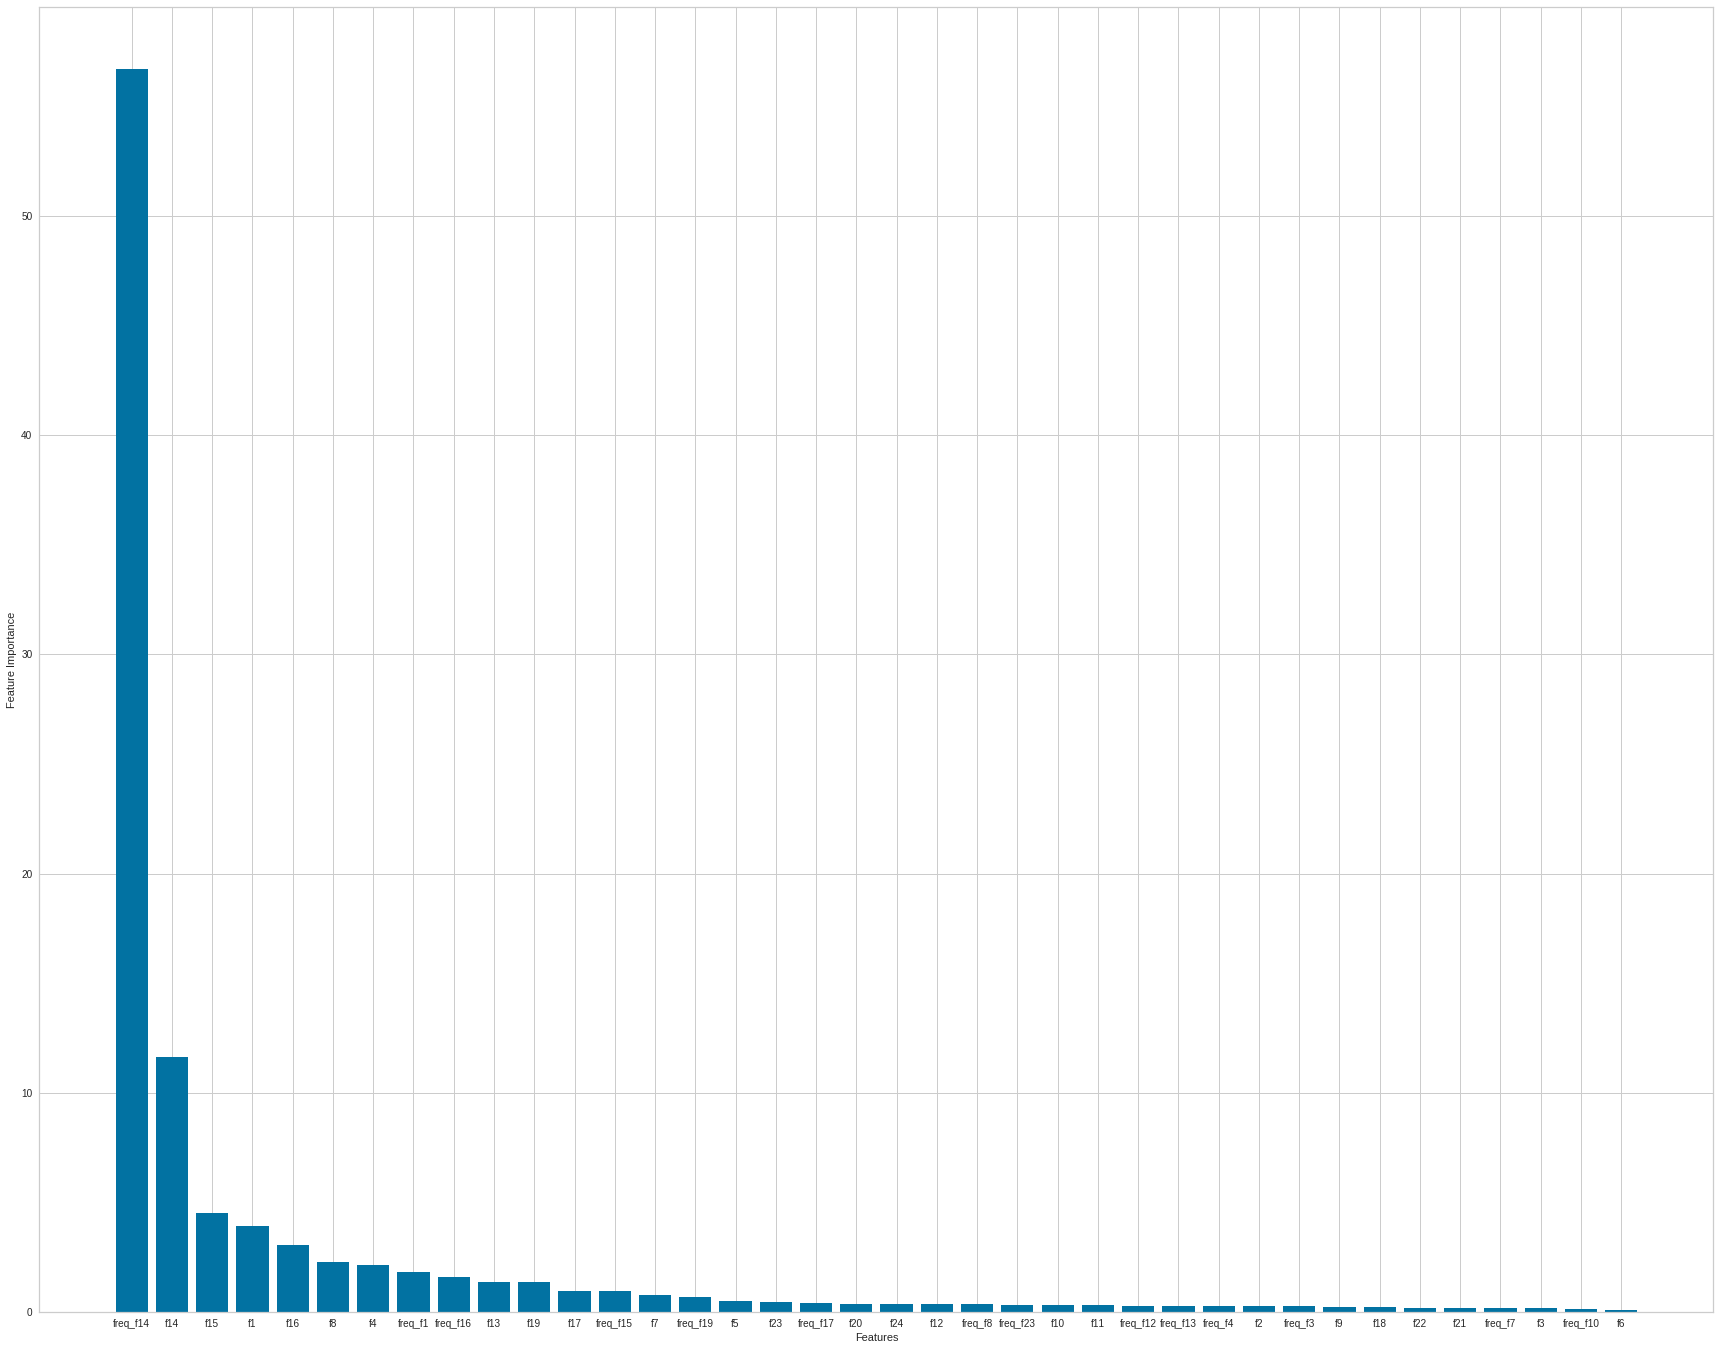

In [225]:
feat_imp=model.get_feature_importance(prettified=True)
plt.subplots(figsize=(30,24))
plt.bar(feat_imp['Feature Id'], feat_imp['Importances'])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
#plt.xticks(rotation=90)

In [226]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})

# CV is always done with the entire train set X_Train, y

cv_data = cv(Pool(X_train, y_train, cat_features=cat_features), params=cv_params,
             plot=True,
             verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (200 iterations wait)


In [227]:
print('Best validation AUC score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-AUC-mean']),
    cv_data['test-AUC-std'][np.argmax(cv_data['test-AUC-mean'])],
    np.argmax(cv_data['test-AUC-mean'])
))

Best validation AUC score: 0.91±0.01 on step 552


In [228]:
score = np.max(cv_data['test-AUC-mean'])
print('Precise AUC score from cross-validation: ', score)

Precise AUC score from cross-validation:  0.9063286440629822


Text(0, 0.5, 'test-AUC-Mean')

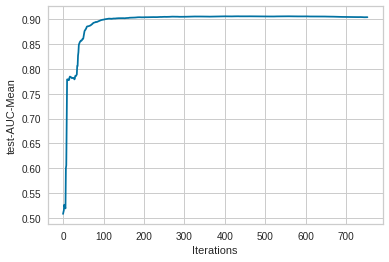

In [229]:
cv_data['test-AUC-mean'].plot()
plt.xlabel('Iterations')
plt.ylabel('test-AUC-Mean')

In [230]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:

In [231]:
train_pool = Pool(X_train, y_train, cat_features=cat_features)
validate_pool = Pool(X_val, y_val, cat_features=cat_features)

In [70]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

print(hp.uniform('learning_rate', 1e-2, 1e-1))

0 float
1   hyperopt_param
2     Literal{learning_rate}
3     uniform
4       Literal{0.01}
5       Literal{0.1}


In [72]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [75]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
#COmmented out as it takes too long to run. 
#Under construction, some things can be improved.
space = {
    'depth': hp.quniform("depth", 6, 10, 1),
    #'border_count': hp.quniform('border_count', 32, 255, 1),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 2, 7),
    #'rsm': hp.uniform('rsm', 0.1, 1), # use only when task_type is default CPU
    #'learning_rate': hp.uniform('learning_rate', 1e-2, 1e-1)
    #'scale_pos_weight': hp.uniform('scale_pos_weight', 0.06, 1), # Can be set only when loss_function is default Logloss
    #'loss_function' : hp.choice('loss_function', ['Logloss', 'CrossEntropy'])
}


def hyperparameter_tuning(space):
    model = CatBoostClassifier(depth=int(space['depth']),
                               border_count=254,
                               l2_leaf_reg=space['l2_leaf_reg'],
                               learning_rate = 0.07253539, 
                               #rsm=space['rsm'],
                               #scale_pos_weight=space['scale_pos_weight'],
                               loss_function='Logloss',
                               task_type='GPU', # change to CPU when working on personal system
                               eval_metric='AUC',
                               early_stopping_rounds=200,
                               thread_count=-1)

    model.fit(X_train, y_train, cat_features=cat_features,use_best_model=True,
              verbose=False, eval_set=(X_val, y_val))

    preds_class = model.predict_proba(X_val)
    #score = classification_report(y_val, preds_class, output_dict=True)['0']['f1-score']
    score = roc_auc_score(y_val, preds_class[:,1])
    return{'loss': 1-score, 'status': STATUS_OK}

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable

best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=50)

timer(start_time) # timing ends here for "start_time" variable

print(best)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

  2%|▏         | 1/50 [00:18<15:25, 18.90s/trial, best loss: 0.08582273330763623]

  4%|▍         | 2/50 [00:47<17:29, 21.86s/trial, best loss: 0.08582273330763623]

  6%|▌         | 3/50 [01:24<20:36, 26.30s/trial, best loss: 0.08582273330763623]

  8%|▊         | 4/50 [01:43<18:37, 24.29s/trial, best loss: 0.08582273330763623]

 10%|█         | 5/50 [02:16<20:09, 26.87s/trial, best loss: 0.08582273330763623]

 12%|█▏        | 6/50 [02:37<18:16, 24.92s/trial, best loss: 0.08582273330763623]

 14%|█▍        | 7/50 [03:09<19:30, 27.21s/trial, best loss: 0.08582273330763623]

 16%|█▌        | 8/50 [03:29<17:24, 24.87s/trial, best loss: 0.0852811326680658] 

 18%|█▊        | 9/50 [04:04<19:10, 28.07s/trial, best loss: 0.0852811326680658]

 20%|██        | 10/50 [04:30<18:11, 27.28s/trial, best loss: 0.0852811326680658]

 22%|██▏       | 11/50 [05:00<18:22, 28.26s/trial, best loss: 0.0852811326680658]

 24%|██▍       | 12/50 [05:23<16:48, 26.53s/trial, best loss: 0.0852811326680658]

 26%|██▌       | 13/50 [05:47<15:53, 25.77s/trial, best loss: 0.0852811326680658]

 28%|██▊       | 14/50 [06:18<16:23, 27.33s/trial, best loss: 0.0852811326680658]

 30%|███       | 15/50 [06:54<17:26, 29.89s/trial, best loss: 0.0852811326680658]

 32%|███▏      | 16/50 [07:30<18:04, 31.91s/trial, best loss: 0.0852811326680658]

 34%|███▍      | 17/50 [08:16<19:51, 36.10s/trial, best loss: 0.0852811326680658]

 36%|███▌      | 18/50 [08:39<17:11, 32.25s/trial, best loss: 0.0852811326680658]

 38%|███▊      | 19/50 [09:04<15:29, 30.00s/trial, best loss: 0.0852811326680658]

 40%|████      | 20/50 [09:43<16:17, 32.57s/trial, best loss: 0.0852811326680658]

 42%|████▏     | 21/50 [09:57<13:10, 27.27s/trial, best loss: 0.0852811326680658]

 44%|████▍     | 22/50 [10:15<11:18, 24.23s/trial, best loss: 0.0852811326680658]

 46%|████▌     | 23/50 [10:32<10:00, 22.23s/trial, best loss: 0.0852811326680658]

 48%|████▊     | 24/50 [10:50<09:04, 20.95s/trial, best loss: 0.0852811326680658]

 50%|█████     | 25/50 [11:08<08:18, 19.94s/trial, best loss: 0.0852811326680658]

 52%|█████▏    | 26/50 [12:01<11:56, 29.86s/trial, best loss: 0.0852811326680658]

 54%|█████▍    | 27/50 [12:17<09:49, 25.64s/trial, best loss: 0.08516157008865466]

 56%|█████▌    | 28/50 [12:39<09:01, 24.60s/trial, best loss: 0.08516157008865466]

 58%|█████▊    | 29/50 [12:53<07:30, 21.47s/trial, best loss: 0.08516157008865466]

 60%|██████    | 30/50 [13:17<07:23, 22.19s/trial, best loss: 0.08516157008865466]

 62%|██████▏   | 31/50 [13:37<06:48, 21.52s/trial, best loss: 0.08516157008865466]

 64%|██████▍   | 32/50 [13:57<06:22, 21.22s/trial, best loss: 0.08516157008865466]

 66%|██████▌   | 33/50 [14:12<05:29, 19.36s/trial, best loss: 0.08516157008865466]

 68%|██████▊   | 34/50 [14:32<05:11, 19.48s/trial, best loss: 0.08516157008865466]

 70%|███████   | 35/50 [14:49<04:39, 18.63s/trial, best loss: 0.08371432752294883]

 72%|███████▏  | 36/50 [15:35<06:17, 26.99s/trial, best loss: 0.08371432752294883]

 74%|███████▍  | 37/50 [15:56<05:25, 25.03s/trial, best loss: 0.08371432752294883]

 76%|███████▌  | 38/50 [16:12<04:29, 22.44s/trial, best loss: 0.08371432752294883]

 78%|███████▊  | 39/50 [16:31<03:57, 21.56s/trial, best loss: 0.08371432752294883]

 80%|████████  | 40/50 [17:16<04:43, 28.35s/trial, best loss: 0.08371432752294883]

 82%|████████▏ | 41/50 [17:35<03:51, 25.71s/trial, best loss: 0.08371432752294883]

 84%|████████▍ | 42/50 [17:53<03:06, 23.28s/trial, best loss: 0.08371432752294883]

 86%|████████▌ | 43/50 [18:13<02:36, 22.31s/trial, best loss: 0.08371432752294883]

 88%|████████▊ | 44/50 [18:41<02:23, 23.98s/trial, best loss: 0.08371432752294883]

 90%|█████████ | 45/50 [18:57<01:48, 21.66s/trial, best loss: 0.08371432752294883]

 92%|█████████▏| 46/50 [19:16<01:23, 20.91s/trial, best loss: 0.08371432752294883]

 94%|█████████▍| 47/50 [19:45<01:09, 23.28s/trial, best loss: 0.08371432752294883]

 96%|█████████▌| 48/50 [20:02<00:42, 21.29s/trial, best loss: 0.08371432752294883]

 98%|█████████▊| 49/50 [20:27<00:22, 22.64s/trial, best loss: 0.08371432752294883]

100%|██████████| 50/50 [20:47<00:00, 24.95s/trial, best loss: 0.08371432752294883]

 Time taken: 0 hours 20 minutes and 47.42 seconds.
{'depth': 6.0, 'l2_leaf_reg': 3.0003885447005105}


#### Best Model4 10/23 att17
{'depth': 6.0, 'l2_leaf_reg': 3.0003885447005105}

### best loss: 0.08371432752294883


In [150]:
params4 = model.get_all_params()
model.get_params()

{'custom_metric': ['TotalF1'],
 'eval_metric': 'AUC',
 'early_stopping_rounds': 200}

In [232]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)

'''
params2 = model.get_params
model2 = CatBoostClassifier(**params2)
# Best of the tuned models
model = (border_count=255, depth=8, l2_leaf_reg=5.451359876901255,
                           scale_pos_weight=0.8408122062399312, 
                           eval_metric='AUC',
                           use_best_model=True,
                          early_stopping_rounds=100)
'''
model4 = CatBoostClassifier(
    l2_leaf_reg=int(3.0003885447005105),
    learning_rate=0.07253539,
    depth=6.0,
    iterations=750,
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    loss_function='Logloss',
    early_stopping_rounds=100)

cv_params = model4.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})

# CV always done with all training set X_Train, y
cv_data = cv(Pool(X_Train, Y_Train, cat_features=cat_features), params=cv_params,
             plot=True,
             verbose=False)

(16383, 38)
(16383,)
(16385, 38)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (100 iterations wait)


In [233]:
model4.get_params()

{'iterations': 750,
 'learning_rate': 0.07253539,
 'depth': 6.0,
 'l2_leaf_reg': 3,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': False,
 'eval_metric': 'AUC',
 'early_stopping_rounds': 100}

{'iterations': 750,
 'learning_rate': 0.07253539,
 'depth': 6.0,
 'l2_leaf_reg': 3,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': False,
 'eval_metric': 'AUC',
 'early_stopping_rounds': 100}

In [234]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-AUC-mean']),
    cv_data['test-AUC-std'][np.argmax(cv_data['test-AUC-mean'])],
    np.argmax(cv_data['test-AUC-mean'])
))

score = np.max(cv_data['test-AUC-mean'])
print('Precise AUC score from cross-validation: ', score)

Best validation accuracy score: 0.91±0.01 on step 275
Precise AUC score from cross-validation:  0.9123988715437954


Text(0, 0.5, 'test-AUC-Mean')

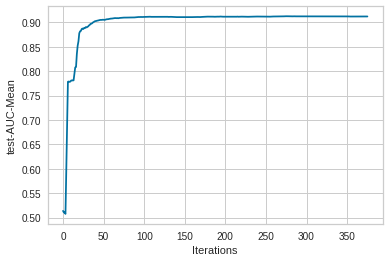

In [235]:
cv_data['test-AUC-mean'].plot()
plt.xlabel('Iterations')
plt.ylabel('test-AUC-Mean')

## Make submission
* Fit the best trained model. 
* Check performance
* Submit with changed csv name for identification

In [236]:
# Trained on the entire training set X_Train, y
best4=model4.fit(X_Train, Y_Train, cat_features=cat_features,
          verbose=False, plot=False)



## Performance of best tuned model


[[ 144   37]
 [   3 3093]]
AUC score:  0.9981137664710837
Logloss :  0.0393273827565361
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       181
           1       0.99      1.00      0.99      3096

    accuracy                           0.99      3277
   macro avg       0.98      0.90      0.94      3277
weighted avg       0.99      0.99      0.99      3277



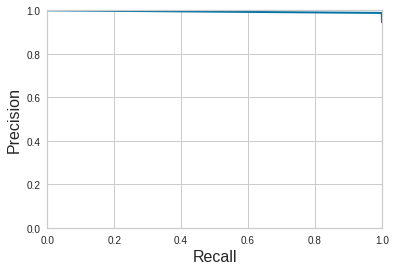

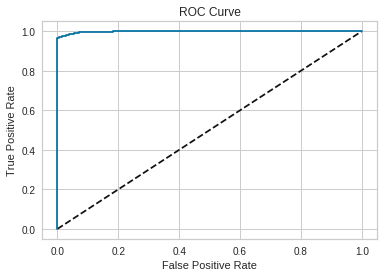

In [237]:
performance(model4, X_val, y_val)


In [157]:
## test_preds = xgb_model_full_data.predict(X_Test)
test_preds = model4.predict_proba(X_Test)[:,1]
print(test_preds.shape)
print(test_preds)


(16385,)
[0.99261467 0.65911618 0.9997592  ... 0.99978293 0.95330484 0.99218077]


In [158]:
# Exponentiate the preds to get probabilities
# Since we log transformed the original features

submission = pd.read_csv("sample_submission.csv")
submission.shape

# Append predictions from blended models
submission.iloc[:,1] = test_preds

In [159]:
submission.to_csv("submission_binaryclass_catboostTuned5_att17.csv", index=False)

In [239]:
model4.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 750,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:P

## Adding stacked models.

## Best LGBM model1 
AUC 0.747 params {'colsample_bytree': 0.9604405120046196, 'num_leaves': 12.0}


In [240]:
from lightgbm import LGBMRegressor, LGBMClassifier
#print("Hyperopt estimated optimum {}".format(best_lgbm))


NameError: name 'best_lgbm' is not defined

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9604405120046196,
 'importance_type': 'split',
 'learning_rate': 0.02,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 12,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'eval_metric': 'AUC',
 'thread_count': 1}

In [241]:
 model_lgbm = LGBMClassifier(    #max_depth = 10,
                               n_estimators=500,
                               eval_metric='AUC',
                               #early_stopping_rounds=100,
                               num_leaves= 12,
                               colsample_bytree=0.9604405120046196,
                               boosting_type='gbdt',
                               learning_rate=0.02,
                               thread_count=1,
                               min_child_weight = 0.001,
                               max_depth=-1,
                               n_jobs = -1)

In [242]:
model_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9604405120046196,
 'importance_type': 'split',
 'learning_rate': 0.02,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 12,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'eval_metric': 'AUC',
 'thread_count': 1}

### Best XGBClassifier

In [243]:
xgbBest = XGBClassifier(
                       n_estimators=3000,
                       booster='gbtree',
                       max_depth=5,
                       gamma=0.5,
                       subsample=0.8,
                       colsample_bytree=0.6,
                       objective='binary:logistic',
                       nthread=1,
                       n_jobs=24,
                       min_child_weight=1,
                       leaning_rate=0.01,
                       silent=0,
                       seed=42,
                       reg_alpha=0.0006,
                       #tree_method='gpu_hist',
                       #predictor = 'gpu_predictor',
                       #gpu_id=0,
                       random_state=1001)


## Best decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier
dtBest = DecisionTreeClassifier(max_depth=4)


In [247]:
from mlxtend.classifier import StackingCVClassifier

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVClassifier(classifiers=(xgbBest, model_lgbm, dtBest),
                                meta_classifier=model4,
                                n_jobs = -1,
                                use_probas=True,
                                use_features_in_secondary=True)

In [251]:
from sklearn import model_selection

print('5-fold cross validation:\n')

for clf, label in zip([xgbBest, model_lgbm, dtBest, model4, stack_gen], 
                      ['XGBoostClassifier', 
                       'LGBMClassifier', 
                       'Decision Tree',
                       'CatBoost',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_Train, Y_Train, 
                                              cv=5, scoring='roc_auc', n_jobs=24)
    print("AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

AUC: 0.89 (+/- 0.01) [XGBoostClassifier]
AUC: 0.87 (+/- 0.01) [LGBMClassifier]
AUC: 0.80 (+/- 0.01) [Decision Tree]
AUC: 0.88 (+/- 0.01) [CatBoost]
AUC: 0.88 (+/- 0.01) [StackingClassifier]


In [252]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_Train), np.array(Y_Train))


START Fit
stack_gen
[18:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { leaning_rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[[ 130   51]
 [   0 3096]]
AUC score:  0.9984546090482105
Logloss :  0.04949297094791578
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       181
           1       0.98      1.00      0.99      3096

    accuracy                           0.98      3277
   macro avg       0.99      0.86      0.91      3277
weighted avg       0.98      0.98      0.98      3277



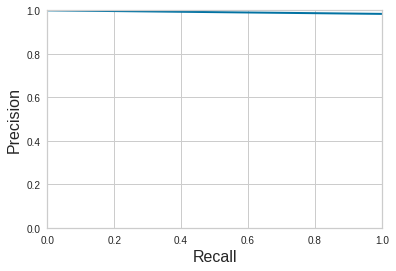

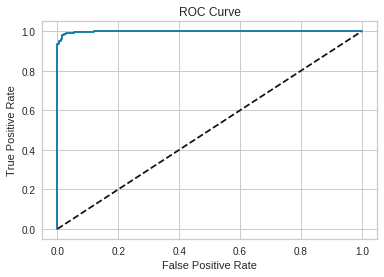

In [253]:
performance(stack_gen_model, X_val, y_val)


In [262]:
## test_preds = xgb_model_full_data.predict(X_Test)
test_preds = stack_gen_model.predict_proba(X_Test)[:,1]
print(test_preds.shape)
print(test_preds)


(16385,)
[0.96579469 0.82394941 0.9999287  ... 0.99986884 0.98229529 0.97285861]


In [263]:
# Exponentiate the preds to get probabilities
# Since we log transformed the original features

submission = pd.read_csv("sample_submission.csv")
submission.shape

# Append predictions from blended models
submission.iloc[:,1] = test_preds

In [264]:
submission.to_csv("submission_binaryclass_catboostStackedTuned1_att18.csv", index=False)

In [265]:
stack_gen_model.get_params()

{'classifiers': (XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=0.6, gamma=0.5,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                leaning_rate=0.01, learning_rate=None, max_delta_step=None,
                max_depth=5, min_child_weight=1, missing=nan,
                monotone_constraints=None, n_estimators=3000, n_jobs=24,
                nthread=1, num_parallel_tree=None, random_state=1001,
                reg_alpha=0.0006, reg_lambda=None, scale_pos_weight=None, seed=42,
                silent=0, subsample=0.8, tree_method=None,
                validate_parameters=None, verbosity=None),
  LGBMClassifier(colsample_bytree=0.9604405120046196, eval_metric='AUC',
                 learning_rate=0.02, n_estimators=500, num_leaves=12,
                 thread_count=1),
  DecisionTreeClassifier(max_depth=4)),
 'cv': 2,
 'drop_proba_col': None,
 'meta_classifier__it

{'classifiers': (XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=0.6, gamma=0.5,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                leaning_rate=0.01, learning_rate=None, max_delta_step=None,
                max_depth=5, min_child_weight=1, missing=nan,
                monotone_constraints=None, n_estimators=3000, n_jobs=24,
                nthread=1, num_parallel_tree=None, random_state=1001,
                reg_alpha=0.0006, reg_lambda=None, scale_pos_weight=None, seed=42,
                silent=0, subsample=0.8, tree_method=None,
                validate_parameters=None, verbosity=None),
  LGBMClassifier(colsample_bytree=0.9604405120046196, eval_metric='AUC',
                 learning_rate=0.02, n_estimators=500, num_leaves=12,
                 thread_count=1),
  DecisionTreeClassifier(max_depth=4)),
 'cv': 2,
 'drop_proba_col': None,
 'meta_classifier__iterations': 750,
 'meta_classifier__learning_rate': 0.07253539,
 'meta_classifier__depth': 6.0,
 'meta_classifier__l2_leaf_reg': 3,
 'meta_classifier__loss_function': 'Logloss',
 'meta_classifier__random_seed': 42,
 'meta_classifier__verbose': False,
 'meta_classifier__eval_metric': 'AUC',
 'meta_classifier__early_stopping_rounds': 100,
 'meta_classifier': <catboost.core.CatBoostClassifier at 0x7f8cdf6212e0>,
 'n_jobs': -1,
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'shuffle': True,
 'store_train_meta_features': False,
 'stratify': True,
 'use_clones': True,
 'use_features_in_secondary': True,
 'use_probas': True,
 'verbose': 0,
 'xgbclassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=0.6, gamma=0.5,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               leaning_rate=0.01, learning_rate=None, max_delta_step=None,
               max_depth=5, min_child_weight=1, missing=nan,
               monotone_constraints=None, n_estimators=3000, n_jobs=24,
               nthread=1, num_parallel_tree=None, random_state=1001,
               reg_alpha=0.0006, reg_lambda=None, scale_pos_weight=None, seed=42,
               silent=0, subsample=0.8, tree_method=None,
               validate_parameters=None, verbosity=None),
 'lgbmclassifier': LGBMClassifier(colsample_bytree=0.9604405120046196, eval_metric='AUC',
                learning_rate=0.02, n_estimators=500, num_leaves=12,
                thread_count=1),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=4),
 'xgbclassifier__objective': 'binary:logistic',
 'xgbclassifier__base_score': None,
 'xgbclassifier__booster': 'gbtree',
 'xgbclassifier__colsample_bylevel': None,
 'xgbclassifier__colsample_bynode': None,
 'xgbclassifier__colsample_bytree': 0.6,
 'xgbclassifier__gamma': 0.5,
 'xgbclassifier__gpu_id': None,
 'xgbclassifier__importance_type': 'gain',
 'xgbclassifier__interaction_constraints': None,
 'xgbclassifier__learning_rate': None,
 'xgbclassifier__max_delta_step': None,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__missing': nan,
 'xgbclassifier__monotone_constraints': None,
 'xgbclassifier__n_estimators': 3000,
 'xgbclassifier__n_jobs': 24,
 'xgbclassifier__num_parallel_tree': None,
 'xgbclassifier__random_state': 1001,
 'xgbclassifier__reg_alpha': 0.0006,
 'xgbclassifier__reg_lambda': None,
 'xgbclassifier__scale_pos_weight': None,
 'xgbclassifier__subsample': 0.8,
 'xgbclassifier__tree_method': None,
 'xgbclassifier__validate_parameters': None,
 'xgbclassifier__verbosity': None,
 'xgbclassifier__nthread': 1,
 'xgbclassifier__leaning_rate': 0.01,
 'xgbclassifier__silent': 0,
 'xgbclassifier__seed': 42,
 'lgbmclassifier__boosting_type': 'gbdt',
 'lgbmclassifier__class_weight': None,
 'lgbmclassifier__colsample_bytree': 0.9604405120046196,
 'lgbmclassifier__importance_type': 'split',
 'lgbmclassifier__learning_rate': 0.02,
 'lgbmclassifier__max_depth': -1,
 'lgbmclassifier__min_child_samples': 20,
 'lgbmclassifier__min_child_weight': 0.001,
 'lgbmclassifier__min_split_gain': 0.0,
 'lgbmclassifier__n_estimators': 500,
 'lgbmclassifier__n_jobs': -1,
 'lgbmclassifier__num_leaves': 12,
 'lgbmclassifier__objective': None,
 'lgbmclassifier__random_state': None,
 'lgbmclassifier__reg_alpha': 0.0,
 'lgbmclassifier__reg_lambda': 0.0,
 'lgbmclassifier__silent': True,
 'lgbmclassifier__subsample': 1.0,
 'lgbmclassifier__subsample_for_bin': 200000,
 'lgbmclassifier__subsample_freq': 0,
 'lgbmclassifier__eval_metric': 'AUC',
 'lgbmclassifier__thread_count': 1,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': 'deprecated',
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

## Trying Blended models

In [272]:
print('START Fit')

print('XGBoost')
xgbBest_model = xgbBest.fit(np.array(X_Train), np.array(Y_Train))

START Fit
XGBoost
[18:42:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { leaning_rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [273]:
performance(xgbBest_model, X_val, y_val)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37'] ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'freq_f7', 'freq_f15', 'freq_f4', 'freq_f16', 'freq_f8', 'freq_f12', 'freq_f17', 'freq_f3', 'freq_f23', 'freq_f13', 'freq_f10', 'freq_f14', 'freq_f1', 'freq_f19']
expected f25, f0, f30, f32, f26, f34, f27, f37, f35, f33, f36, f31, f29, f28 in input data
training data did not have the following fields: freq_f10, freq_f23, freq_f8, freq_f17, freq_f12, freq_f7, freq_f4, freq_f19, freq_f15, freq_f14, freq_f3, freq_f13, freq_f16, freq_f1

In [274]:
def blend1_predict_proba(X):
    return ((0.20 * stack_gen_model.predict_proba(X)) + \
            (0.30 * xgbBest.predict_proba(X)) + \
            (0.50 * model4.predict_proba(X))
    )
    

In [275]:
## test_preds = xgb_model_full_data.predict(X_Test)
test_preds = blend1_predict_proba(X_Test)[:,1]
print(test_preds.shape)
print(test_preds)


(16385,)
[0.98420573 0.77849714 0.99986303 ... 0.99986197 0.97171766 0.98966106]


In [276]:
# Exponentiate the preds to get probabilities
# Since we log transformed the original features

submission = pd.read_csv("sample_submission.csv")
submission.shape

# Append predictions from blended models
submission.iloc[:,1] = test_preds

In [277]:
submission.to_csv("submission_binaryclass_catboostStackedTuned1&Blend1_att19.csv", index=False)

## Stack2

In [283]:
lr = LogisticRegression()

# Stack up all the models above, optimized using xgboost
stack_gen2 = StackingCVClassifier(classifiers=(xgbBest, model_lgbm, model4),
                                meta_classifier=model4,
                                n_jobs = -1,
                                use_probas=True,
                                use_features_in_secondary=True)


In [284]:
from sklearn import model_selection

print('5-fold cross validation:\n')

for clf, label in zip([xgbBest, model_lgbm, dtBest, model4, stack_gen2], 
                      ['XGBoostClassifier', 
                       'LGBMClassifier', 
                       'Decision Tree',
                       'CatBoost',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_Train, Y_Train, 
                                              cv=5, scoring='roc_auc', n_jobs=24)
    print("AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

AUC: 0.89 (+/- 0.01) [XGBoostClassifier]
AUC: 0.87 (+/- 0.01) [LGBMClassifier]
AUC: 0.80 (+/- 0.01) [Decision Tree]
AUC: 0.88 (+/- 0.01) [CatBoost]
AUC: 0.88 (+/- 0.01) [StackingClassifier]


In [285]:
print('START Fit')

print('stack_gen2')
stack_gen_model2 = stack_gen2.fit(np.array(X_Train), np.array(Y_Train))


START Fit
stack_gen2
[18:57:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { leaning_rate, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[[ 157   24]
 [   0 3096]]
AUC score:  0.9997573058089568
Logloss :  0.042558542432511635
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       181
           1       0.99      1.00      1.00      3096

    accuracy                           0.99      3277
   macro avg       1.00      0.93      0.96      3277
weighted avg       0.99      0.99      0.99      3277



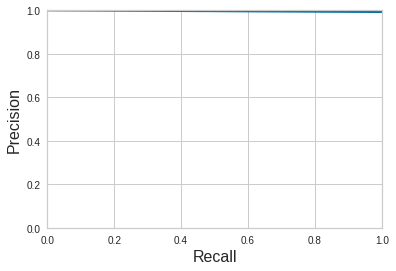

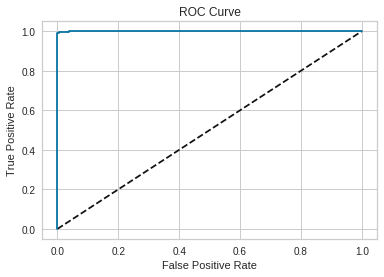

In [286]:
performance(stack_gen_model2, X_val, y_val)


In [288]:
## test_preds = xgb_model_full_data.predict(X_Test)
test_preds = stack_gen_model2.predict_proba(X_Test)[:,1]
print(test_preds.shape)
print(test_preds)


(16385,)
[0.95434031 0.78576913 0.99970567 ... 0.99987751 0.98073307 0.96159779]


In [289]:
# Exponentiate the preds to get probabilities
# Since we log transformed the original features

submission = pd.read_csv("sample_submission.csv")
submission.shape

# Append predictions from blended models
submission.iloc[:,1] = test_preds

In [290]:
submission.to_csv("submission_binaryclass_catboostStacked2Tuned1_att20.csv", index=False)

In [291]:
stack_gen_model2.get_params()

{'classifiers': (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                leaning_rate=0.01, learning_rate=0.300000012, max_delta_step=0,
                max_depth=5, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=3000, n_jobs=24,
                nthread=1, num_parallel_tree=1, random_state=1001,
                reg_alpha=0.0006, reg_lambda=1, scale_pos_weight=1, seed=42,
                silent=0, subsample=0.8, tree_method='exact',
                validate_parameters=1, verbosity=None),
  LGBMClassifier(colsample_bytree=0.9604405120046196, eval_metric='AUC',
                 learning_rate=0.02, n_estimators=500, num_leaves=12,
                 thread_count=1),
  <catboost.core.CatBoostClassifier at 0x7f8cdf6212e0>),
 'cv': 2,
 'drop_proba_col': None,
 'meta_classifier__i

In [294]:
def blend2_predict_proba(X):
    return ((0.40 * stack_gen_model2.predict_proba(X)) + \
            (0.20 * xgbBest.predict_proba(X)) + \
            (0.40 * model4.predict_proba(X))
    )
    

In [295]:
## test_preds = xgb_model_full_data.predict(X_Test)
test_preds = blend2_predict_proba(X_Test)[:,1]
print(test_preds.shape)
print(test_preds)

# Exponentiate the preds to get probabilities
# Since we log transformed the original features

submission = pd.read_csv("sample_submission.csv")
submission.shape

# Append predictions from blended models
submission.iloc[:,1] = test_preds

(16385,)
[0.97707243 0.81233116 0.99983637 ... 0.99989376 0.97835296 0.98479885]


In [296]:
submission.to_csv("submission_binaryclass_catboostStacked2Tuned1&Blend2_att21.csv", index=False)

## Submit this .csv again
10/23 11:50pm. I forgot to include the latest stack_gen_model2 in the blend. 

In [305]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# validate model on given dataset and report CV score
def validate_model(model, data):
    skf = StratifiedKFold(n_splits=5, random_state = 4141, shuffle = True)
    stats = cross_validate(
        model, data[0], data[1], 
        groups=None, scoring='roc_auc', 
        cv=skf, n_jobs=-1, return_train_score = True
    )
    stats = pd.DataFrame(stats)
    return stats.describe().transpose()

In [306]:
validate_model(
    model = stack_gen_model2, 
    data = [X_Train, Y_Train]
)


,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,142.823864,4.045596,137.213949,139.918620,144.835435,145.650752,146.500562
score_time,5.0,0.248749,0.024496,0.222163,0.240601,0.245835,0.246245,0.288903
test_score,5.0,0.877394,0.012273,0.857022,0.876351,0.880318,0.884784,0.888493
train_score,5.0,0.997292,0.003155,0.992098,0.996491,0.999005,0.999210,0.999654


In [307]:
import pickle
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(stack_gen_model2, 'stack_gen_model2.pkl') 


/home/local/lambda/rishabhs/anaconda3/envs/ee460j/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['stack_gen_model2.pkl']

In [308]:
validate_model(
    model = xgbBest, 
    data = [X_Train, Y_Train]
)


,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,37.898196,0.279310,37.738706,37.769012,37.790979,37.796083,38.396199
score_time,5.0,0.164525,0.061382,0.111210,0.121459,0.129140,0.215570,0.245247
test_score,5.0,0.882738,0.009306,0.870987,0.878720,0.882550,0.885024,0.896409
train_score,5.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
# Save the model as a pickle in a file 
joblib.dump(xgbBest, 'xgbBest.pkl') 


['xgbBest.pkl']

In [311]:
validate_model(
    model = model4, 
    data = [X_Train, Y_Train]
)



,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,33.435364,2.019645,30.001441,33.231392,34.431421,34.738225,34.774342
score_time,5.0,0.015517,0.007592,0.007310,0.007824,0.018488,0.019571,0.024391
test_score,5.0,0.880654,0.008187,0.872419,0.875713,0.877304,0.885167,0.892666
train_score,5.0,0.998715,0.001257,0.996540,0.998751,0.999285,0.999388,0.999613


In [312]:
# Save the model as a pickle in a file 
joblib.dump(model4, 'model4_catBoost.pkl') 

['model4_catBoost.pkl']